# Analysis on Immigration, Stock market, and GDP 

## Abstract

The goal of this project is to use **Pandas Dataframe** for analyzing the Immigration, Stock Market data and GDP and to identify correlation between them

#### To enable multiple output

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Importing Packages

Installed the **wbdata** package for API access to Worldbank data

In [2]:
import wbdata #In order to get the Stock, GDP and Immigration data
import pandas as pd

## To get the data on GDP per capita growth (annual %) as a dataframe

In [3]:
wbdata.search_indicators("GDP per capita growth (annual %)")

NY.GDP.PCAP.KD.ZG	GDP per capita growth (annual %)


In [4]:
indicators = {"NY.GDP.PCAP.KD.ZG": "GDP per capita growth (annual %)"}
GDP_df = wbdata.get_dataframe(indicators, country="USA", convert_date=True)

#### Rounding off the GDP growth rate to two decimal places

In [5]:
GDP_df=GDP_df.round(2)
GDP_df.head()

,GDP per capita growth (annual %)
date,
2017-01-01,NaN
2016-01-01,0.78
2015-01-01,2.11
2014-01-01,1.61
2013-01-01,0.97


## To get the data on Net immigration as a dataframe(value in %)

In [6]:
wbdata.search_indicators("Net migration")

SM.POP.NETM	Net migration


In [7]:
wbdata.search_indicators("Population, total")

SP.POP.TOTL	Population, total


In [8]:
indicators = {"SP.POP.TOTL": "Total Population","SM.POP.NETM": "Net migration"}
Pop_df = wbdata.get_dataframe(indicators, country="USA", convert_date=True)
Pop_df['Immigration_Rate_%'] = (Pop_df['Net migration']/Pop_df['Total Population'])*1000

#### Rounding off the immigration rate to two decimal places

In [9]:
Pop_df['Immigration_Rate_%']=Pop_df['Immigration_Rate_%'].round(2)
Pop_df.head(6)

,Net migration,Total Population,Immigration_Rate_%
date,,,
2017-01-01,NaN,NaN,NaN
2016-01-01,NaN,323127513.0,NaN
2015-01-01,NaN,320896618.0,NaN
2014-01-01,NaN,318563456.0,NaN
2013-01-01,NaN,316204908.0,NaN
2012-01-01,4500000.0,313998379.0,14.33


### Cleaning the Immigration dataframe by dropping the unwanted columns and removing NaN values

In [10]:
Immigration_Rate_df=Pop_df.copy()
Immigration_Rate_df=Immigration_Rate_df.drop('Net migration',axis=1)
Immigration_Rate_df=Immigration_Rate_df.drop('Total Population',axis=1)
Immigration_Rate_df=Immigration_Rate_df.dropna(axis=0, how='all')
Immigration_Rate_df

,Immigration_Rate_%
date,
2012-01-01,14.33
2007-01-01,16.71
2002-01-01,18.10
1997-01-01,31.59
1992-01-01,17.61
1987-01-01,14.15
1982-01-01,14.69
1977-01-01,17.83
1972-01-01,14.01


## To get the data on Stock market return (%, year-on-year) as a dataframe

In [11]:
wbdata.search_indicators("Stock market return")

GFDD.OM.02	Stock market return (%, year-on-year)


In [12]:
indicators = {"GFDD.OM.02": "Stock market return (%, year-on-year)"}
Stock_df = wbdata.get_dataframe(indicators, country="USA", convert_date=True)
Stock_df.head()

,"Stock market return (%, year-on-year)"
date,
2015-01-01,6.71
2014-01-01,17.49
2013-01-01,19.17
2012-01-01,8.81
2011-01-01,11.20


## Combining all the three Dataframes

In [13]:
GDP_Immigration=GDP_df.merge(Immigration_Rate_df,how='inner', left_index=True, right_index=True)

In [14]:
GDP_Immigration_Stock_df=GDP_Immigration.merge(Stock_df,how='inner', left_index=True, right_index=True)
GDP_Immigration_Stock_df

,GDP per capita growth (annual %),Immigration_Rate_%,"Stock market return (%, year-on-year)"
date,,,
2012-01-01,1.46,14.33,8.81
2007-01-01,0.82,16.71,12.72
2002-01-01,0.85,18.10,-16.77
1997-01-01,3.24,31.59,30.27
1992-01-01,2.13,17.61,10.52
1987-01-01,2.54,14.15,21.41
1982-01-01,-2.84,14.69,-6.51
1977-01-01,3.56,17.83,-3.78
1972-01-01,4.14,14.01,11.00


## Visualizing the Immigration Rate, GDP and Stock Data

Populating the interactive namespace from numpy and matplotlib


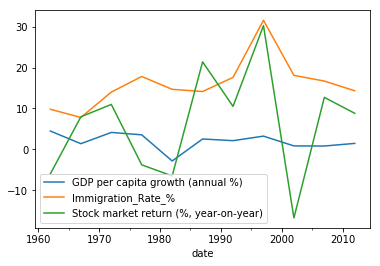

In [15]:
%pylab inline
GDP_Immigration_Stock_df.plot()

We can see that GDP is going steady without much fluctuation but there are variations in Immigration Rate and Stock Market.

In 1997, due to spike in immigration rate, stock market also increased.


## Correlation among these datasets

**"Correlation"** refers to a mutual relationship or association between quantities

#### Correlation between GDP and Immigration Rate

In [16]:
GDP_Immigration_Stock_df['GDP per capita growth (annual %)'].corr(GDP_Immigration_Stock_df['Immigration_Rate_%'])

0.08661169821169594

#### Correlation between GDP and Stock Market

In [17]:
GDP_Immigration_Stock_df['GDP per capita growth (annual %)'].corr(GDP_Immigration_Stock_df['Stock market return (%, year-on-year)'])

0.29177356712520447

We can see that correlation of GDP with stock market is higher than correlation of GDP with immigration rate

#### Correlation between Immigration Rate and Stock Market

In [18]:
GDP_Immigration_Stock_df['Immigration_Rate_%'].corr(GDP_Immigration_Stock_df['Stock market return (%, year-on-year)'])

0.43017491376750994

We can see the positive correlation among the three columns and that means that they have direct influence on each other.